# Results Visualization

In this notebook we are going to calculate and visualize the different continual learning metrics and graphs obtained after the training process of the different experiments carried out.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotly.offline import init_notebook_mode

plt.style.use(["science", "no-latex"])

# mpl.rcParams.update(mpl.rcParamsDefault)
# mpl.rc('font',family='Times New Roman')


init_notebook_mode(connected=False)

In [15]:
results_path = "../final_results/results_all.csv"
df_mert = pd.read_csv(results_path)

In [16]:
results_path = "../final_results_clmr/results_clmr.csv"
df_clmr = pd.read_csv(results_path)

In [17]:
def create_line_figure(df: pd.DataFrame, ax: plt.Axes, caption: str, position: float):
    unique_methods = df.experiment_subtype.unique()
    # Oracle
    df_oracle = df[df.experiment_subtype == "Oracle"]
    mean_accuracy = []
    max_accuracy = []
    min_accuracy = []
    for task_id in range(5):
        accuracy_oracle_task = df_oracle[df_oracle.train_task_number == task_id].Accuracy
        mean_accuracy.append(accuracy_oracle_task.mean() * 100)
        max_accuracy.append(accuracy_oracle_task.max() * 100)
        min_accuracy.append(accuracy_oracle_task.min() * 100)

    ax.axhline(y=mean_accuracy[-1], linestyle="--")

    # Rest of methods
    markers = {"Finetune": ".", "Replay": "^", "iCaRL": "s", "GEM": "p", "EWC": "h", "L2P": "X", "PCC": "d"}
    colors = {
        "Finetune": "#0C5DA5",
        "Replay": "#00B945",
        "iCaRL": "#FF9500",
        "GEM": "#FF2C00",
        "EWC": "#9e9e9e",
        "L2P": "#474747",
        "PCC": "#845B97",
    }
    for method in unique_methods:
        if method in ["Oracle", "CosineCenter"]:
            continue
        elif method == "Finetuning":
            label = "Finetune"
        elif method == "L2Center":
            label = "PCC"
        else:
            label = method

        marker = markers[label]
        color = colors[label]
        mean_accuracy = []
        max_accuracy = []
        min_accuracy = []
        for task_id in range(5):
            accuracy_method_task = df[(df.experiment_subtype == method) & (df.train_task_number == task_id)].Accuracy
            mean_accuracy.append(accuracy_method_task.mean() * 100)
            max_accuracy.append(accuracy_method_task.max() * 100)
            min_accuracy.append(accuracy_method_task.min() * 100)

        ax.plot([1, 2, 3, 4, 5], mean_accuracy, marker=marker, label=label, linewidth=1.0, color=color)
        ax.fill_between([1, 2, 3, 4, 5], min_accuracy, max_accuracy, alpha=0.1, color=color)

    ax.set_xticks([1, 2, 3, 4, 5], [1, 2, 3, 4, 5], fontsize=12)
    ax.set_yticks(range(0, 110, 10), range(0, 110, 10), fontsize=12)
    ax.set_xlim(0.90, 5.1)
    ax.set_ylim(0, 102)
    ax.set_ylabel("Accuracy (%)", fontdict={"fontsize": 14})
    ax.set_xlabel("Sessions", fontdict={"fontsize": 14})
    ax.grid(linestyle="--", linewidth=0.5)
    plt.figtext(position[0], position[1], caption, wrap=True, horizontalalignment="center", fontdict={"fontsize": 17})

In [7]:
df_mert["scenario"] = df_mert.experiment_name.str.split("_").apply(lambda x: x[-1])
df_mert["encoder"] = df_mert.experiment_name.str.split("_").apply(lambda x: x[0])
df_mert_gtzan = df_mert[df_mert.train_dataset_name == "GTZAN"]
df_mert_nsynth = df_mert[df_mert.train_dataset_name == "NSynthInstrument"]
df_mert_vocalset_singer = df_mert[df_mert.train_dataset_name == "VocalSetSinger"]
df_mert_vocalset_tech = df_mert[df_mert.train_dataset_name == "VocalSetTech"]

In [8]:
df_clmr["scenario"] = df_clmr.experiment_name.str.split("_").apply(lambda x: x[-1])
df_clmr["encoder"] = df_clmr.experiment_name.str.split("_").apply(lambda x: x[0])
df_clmr_gtzan = df_clmr[df_clmr.train_dataset_name == "GTZAN"]
df_clmr_nsynth = df_clmr[df_clmr.train_dataset_name == "NSynthInstrument"]
df_clmr_vocalset_singer = df_clmr[df_clmr.train_dataset_name == "VocalSetSinger"]
df_clmr_vocalset_tech = df_clmr[df_clmr.train_dataset_name == "VocalSetTech"]

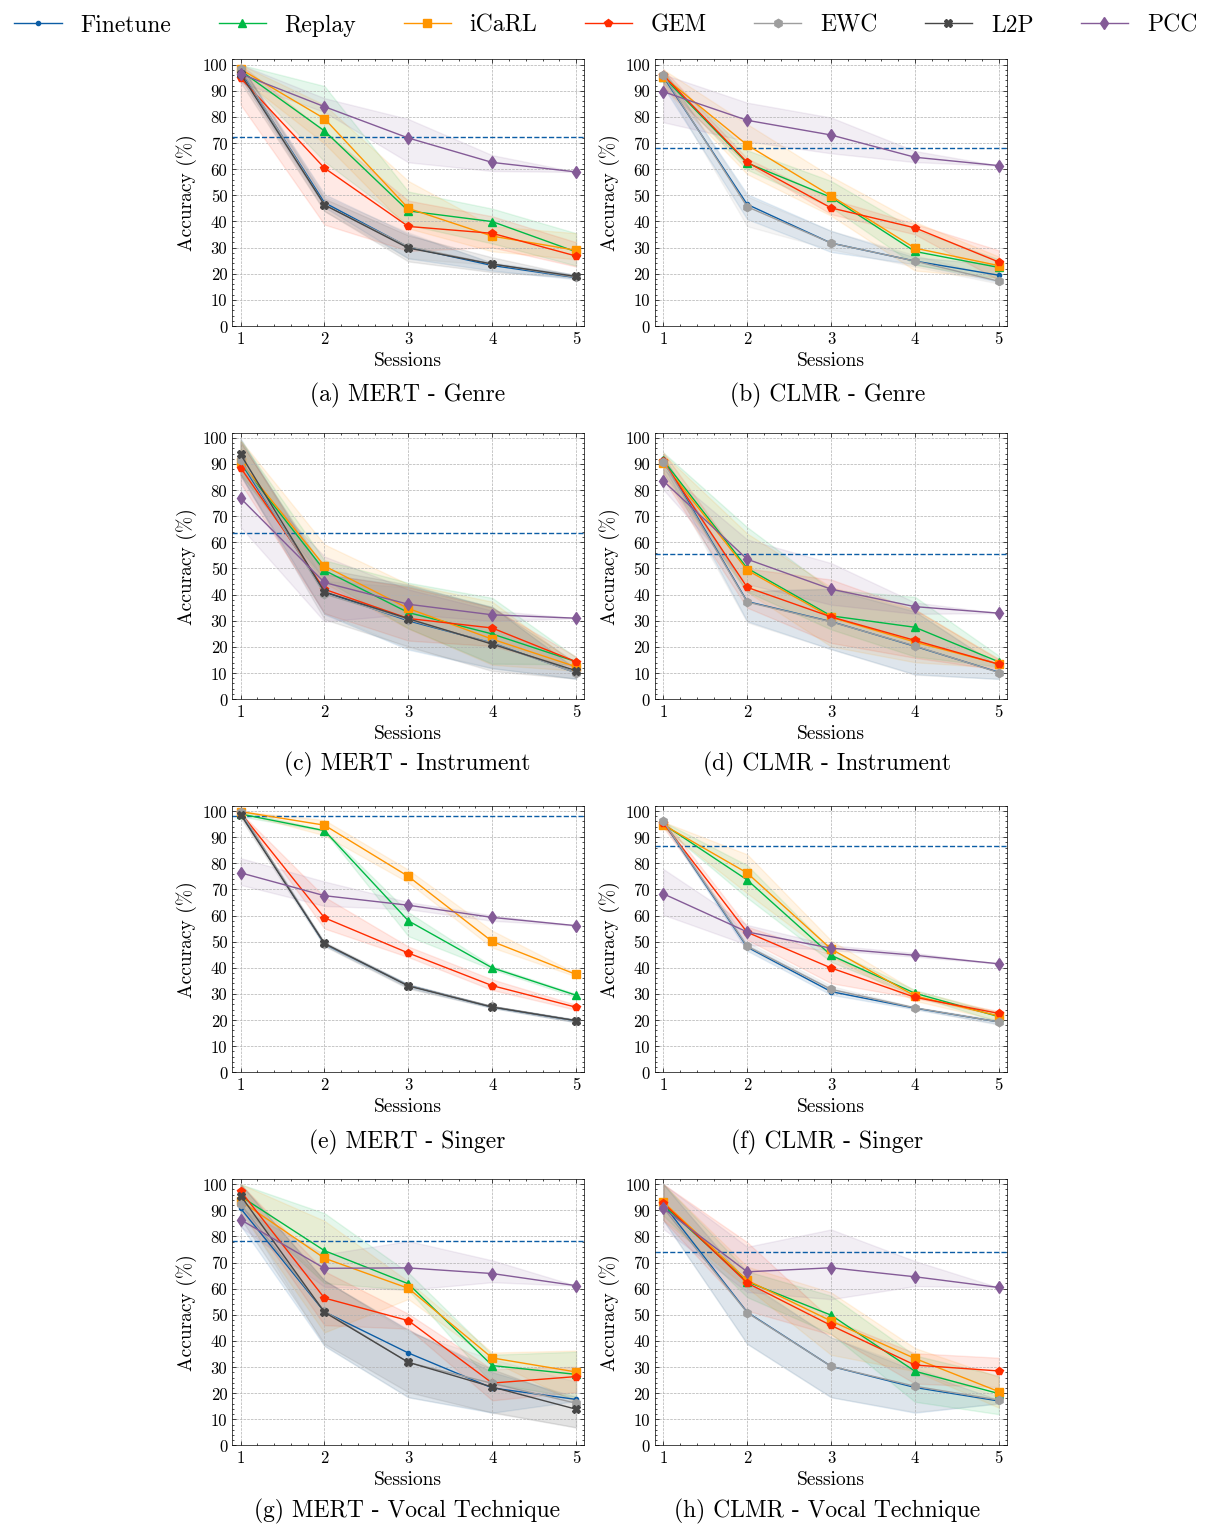

In [28]:
fig, ((ax11, ax21), (ax12, ax22), (ax31, ax32), (ax41, ax42)) = plt.subplots(4, 2)
fig.set_figheight(18)
fig.set_figwidth(10)
create_line_figure(df_mert_gtzan, ax11, "(a) MERT - Genre", position=[0.30, 0.690])
create_line_figure(df_clmr_gtzan, ax21, "(b) CLMR - Genre", position=[0.72, 0.690])
create_line_figure(df_mert_nsynth, ax12, "(c) MERT - Instrument", position=[0.30, 0.485])
create_line_figure(df_clmr_nsynth, ax22, "(d) CLMR - Instrument", position=[0.72, 0.485])
create_line_figure(df_mert_vocalset_singer, ax31, "(e) MERT - Singer", position=[0.30, 0.275])
create_line_figure(df_clmr_vocalset_singer, ax32, "(f) CLMR - Singer", position=[0.72, 0.275])
create_line_figure(df_mert_vocalset_tech, ax41, "(g) MERT - Vocal Technique", position=[0.30, 0.07])
create_line_figure(df_clmr_vocalset_tech, ax42, "(h) CLMR - Vocal Technique", position=[0.72, 0.07])
plt.subplots_adjust(hspace=0.4)
# ax11.legend(bbox_to_anchor=(2.7, -1.2), ncols=1, fontsize=15) # right
ax11.legend(bbox_to_anchor=(2.8, 1.25), ncols=7, fontsize=17)  # top

plt.savefig("acc_vs_exp.pdf", bbox_inches="tight", dpi=600)

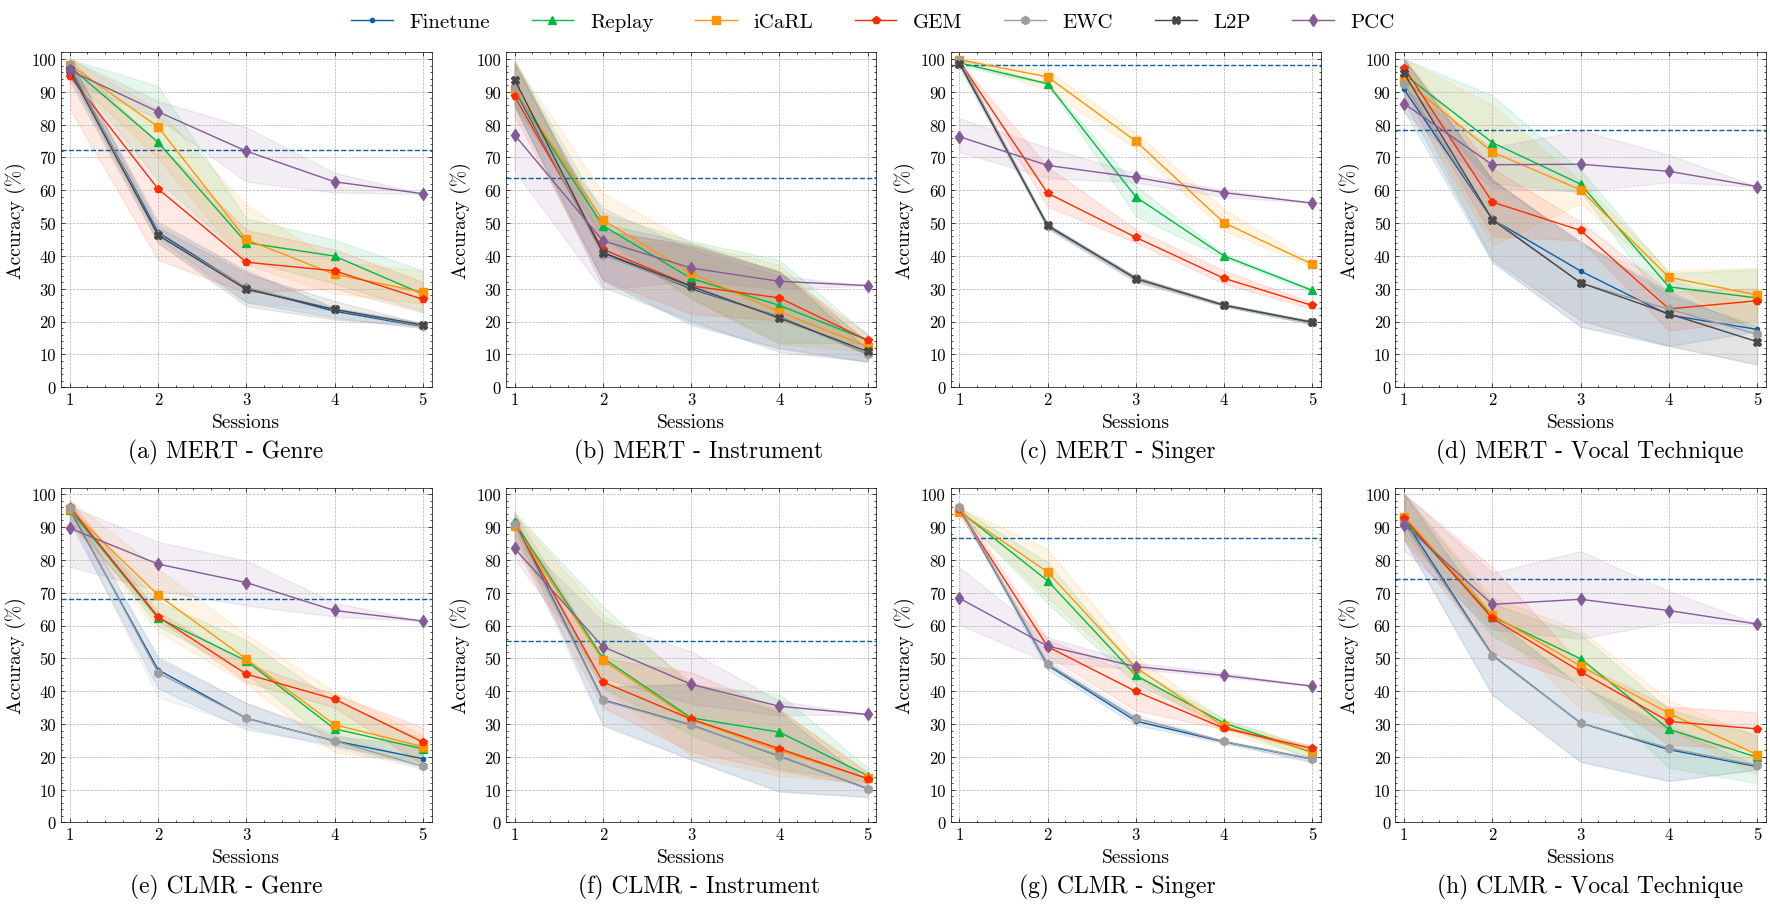

In [9]:
fig, ((ax11, ax12, ax13, ax14), (ax21, ax22, ax23, ax24)) = plt.subplots(2, 4)
fig.set_figheight(10)
fig.set_figwidth(22)
create_line_figure(df_mert_gtzan, ax11, "(a) MERT - Genre", position=[0.2, 0.475])
create_line_figure(df_clmr_gtzan, ax21, "(e) CLMR - Genre", position=[0.2, 0.04])
create_line_figure(df_mert_nsynth, ax12, "(b) MERT - Instrument", position=[0.415, 0.475])
create_line_figure(df_clmr_nsynth, ax22, "(f) CLMR - Instrument", position=[0.415, 0.04])
create_line_figure(df_mert_vocalset_singer, ax13, "(c) MERT - Singer", position=[0.605, 0.475])
create_line_figure(df_clmr_vocalset_singer, ax23, "(g) CLMR - Singer", position=[0.605, 0.04])
create_line_figure(df_mert_vocalset_tech, ax14, "(d) MERT - Vocal Technique", position=[0.82, 0.475])
create_line_figure(df_clmr_vocalset_tech, ax24, "(h) CLMR - Vocal Technique", position=[0.82, 0.04])
plt.subplots_adjust(hspace=0.3)
ax11.legend(bbox_to_anchor=(3.65, 1.175), ncols=7, fontsize=15)
plt.savefig("acc_vs_exp_horizontal.pdf", bbox_inches="tight", dpi=600)

In [8]:
df = pd.concat([df_mert, df_clmr])

In [9]:
df_oracle = df[df.experiment_subtype == "Oracle"]
latex_text = ""
for task in ["GTZAN", "NSynthInstrument", "VocalSetSinger", "VocalSetTech"]:
    for encoder in ["mert95m", "clmrsamplecnn"]:
        mean_accuracy = []
        for task_id in range(5):
            accuracy_oracle_task = df_oracle[
                (df_oracle.train_task_number == task_id)
                & (df_oracle.encoder == encoder)
                & (df_oracle.train_dataset_name == task)
            ].Accuracy
            mean_accuracy.append(accuracy_oracle_task.mean() * 100)
        latex_text += f"& {np.mean(mean_accuracy):.1f} "
print(latex_text)

# Rest of methods
for method in ["Finetuning", "Replay", "iCaRL", "GEM", "EWC", "L2P", "L2Center"]:
    if method in ["Oracle", "CosineCenter"]:
        continue
    elif method == "Finetuning":
        label = "Finetune"
    elif method == "L2Center":
        label = "PCC"
    else:
        label = method

    latex_text = ""
    for task in ["GTZAN", "NSynthInstrument", "VocalSetSinger", "VocalSetTech"]:
        for encoder in ["mert95m", "clmrsamplecnn"]:
            mean_accuracy = []
            for task_id in range(5):
                accuracy_method_task = df[
                    (df.experiment_subtype == method)
                    & (df.train_task_number == task_id)
                    & (df.encoder == encoder)
                    & (df.train_dataset_name == task)
                ].Accuracy
                mean_accuracy.append(accuracy_method_task.mean() * 100)
            latex_text += f"& {np.mean(mean_accuracy):.1f} "
            # print(f"{method=} - {task=} - {encoder}")
    print(latex_text)

& 75.2 & 70.9 & 62.7 & 57.1 & 97.8 & 86.0 & 76.3 & 72.9 
& 43.4 & 43.6 & 38.6 & 37.9 & 45.3 & 43.7 & 43.4 & 42.6 
& 56.9 & 51.6 & 42.4 & 43.0 & 63.8 & 53.0 & 57.9 & 50.6 
& 57.2 & 53.5 & 42.4 & 41.3 & 71.4 & 53.8 & 57.4 & 51.6 
& 51.1 & 53.2 & 40.6 & 40.2 & 52.4 & 48.0 & 50.4 & 52.0 
& 43.5 & 43.1 & 38.7 & 37.6 & 45.4 & 44.0 & 43.1 & 42.4 
& 43.1 & nan & 39.5 & nan & 45.1 & nan & 42.9 & nan 
& 74.8 & 73.5 & 44.2 & 49.5 & 64.6 & 51.2 & 69.8 & 70.0 


In [33]:
df_oracle = df[df.experiment_subtype == "Oracle"]
latex_text = ""
for task in ["GTZAN", "NSynthInstrument", "VocalSetSinger", "VocalSetTech"]:
    for encoder in ["mert95m", "clmrsamplecnn"]:
        accuracy_oracle_task = df_oracle[
            (df_oracle.train_task_number == 4) & (df_oracle.encoder == encoder) & (df_oracle.train_dataset_name == task)
        ].Accuracy
        latex_text += f"& {accuracy_oracle_task.mean() * 100:.1f} "
print(latex_text)

# Rest of methods
for method in ["Finetuning", "Replay", "iCaRL", "GEM", "EWC", "L2P", "L2Center"]:
    if method in ["Oracle", "CosineCenter"]:
        continue
    elif method == "Finetuning":
        label = "Finetune"
    elif method == "L2Center":
        label = "PCC"
    else:
        label = method

    latex_text = ""
    for task in ["GTZAN", "NSynthInstrument", "VocalSetSinger", "VocalSetTech"]:
        for encoder in ["mert95m", "clmrsamplecnn"]:
            accuracy_method_task = df[
                (df.experiment_subtype == method)
                & (df.train_task_number == 4)
                & (df.encoder == encoder)
                & (df.train_dataset_name == task)
            ].Accuracy
            latex_text += f"& {accuracy_method_task.mean() * 100:.1f} "
            # print(f"{method=} - {task=} - {encoder}")
    print(latex_text)

& 72.4 & 67.9 & 63.7 & 55.4 & 98.2 & 86.7 & 78.4 & 74.0 
& 18.5 & 19.4 & 10.1 & 10.3 & 19.7 & 19.3 & 17.6 & 17.0 
& 28.4 & 22.4 & 14.4 & 14.3 & 29.5 & 21.3 & 27.2 & 19.8 
& 29.0 & 23.1 & 12.4 & 13.4 & 37.5 & 21.6 & 28.1 & 20.6 
& 26.8 & 24.5 & 14.3 & 13.4 & 24.9 & 22.5 & 26.4 & 28.5 
& 18.6 & 17.1 & 10.1 & 10.1 & 19.8 & 19.3 & 16.2 & 17.4 
& 19.0 & nan & 10.9 & nan & 19.8 & nan & 13.9 & nan 
& 59.0 & 61.4 & 31.0 & 32.9 & 56.1 & 41.5 & 61.1 & 60.5 
